In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing the training test
from google.colab import files
uploaded = files.upload()
import io
dataset_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
#Reshaping to 3-d with (batch_size, timesteps, input_dim).
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape[1]

60

Part2-Building the Keras libraries and packages

In [0]:
#installing keras
!pip install -q keras

In [11]:
#importing the keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0465
Epoch 2/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0053
Epoch 10/100
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0045
Epoc

Part 3- Making the Prediction

In [20]:
#importing the test
from google.colab import files
uploaded = files.upload()
import io
dataset_test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))
real_stock_price = dataset_test.iloc[:,1:2].values

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [0]:
#predicting the stock price
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values # to only take values that are required i.e. 60 days before jan 17
inputs = inputs.reshape(-1,1) # to convert to numpy arrays
inputs = sc.transform(inputs) # standardising the data


In [29]:
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test= np.array(x_test)
x_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [31]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

20

In [0]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

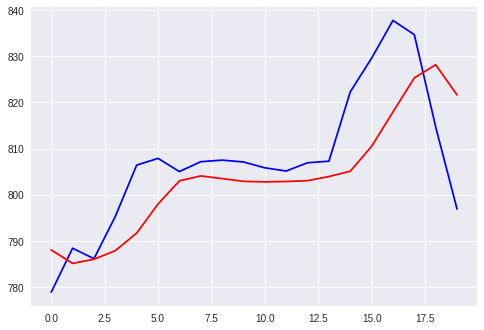

No handles with labels found to put in legend.


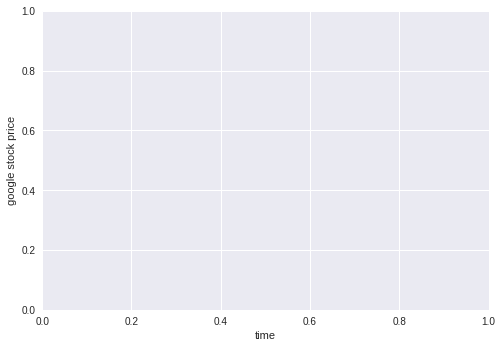

In [34]:
plt.plot(real_stock_price, color = 'blue', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'red', label = 'predicted google stock price')
plt.show('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()